# Part 1. Data Wrangling: Capstone 2

This capstone looks at tweets from a 5-year period of the CEOS of several companies. Their respective stocks are collected and the tweets are analyzed to determine if the closing price of a stock can be determined from the CEO's tweets. The CEOs, their twitter username, and their associated stocks are as follows:  
 - Elon Musk : '@elonmusk': Tesla (TSLA)
 - Aaron Levie : '@levie': Box (BOX)
 - Jack Dorsey : '@jack': Twitter (TWTR)
 - Marc Benioff : '@Benioff': Salesforce (CRM)
 - Richard Branson: @richardbranson: Virgin Galactic (SPCE)
 - John Legere: @JohnLegere: T-Mobile (TMUS)
 
 
These CEOs were selected with the following criteria:  
 - the stock must be a publicly traded company for at least 5 years.
 - the CEO must have tweeted at least 500 times over that span of that 5 years.
 
* [1.1 Contents](#1.1_Contents)<a id='1.1_Contents'></a>
* [1.2 Collecting Data](#1.2_Collecting_Data)
    * [1.2.1 Collecting Stocks](#1.2.1_Collecting_Stocks)
    * [1.2.2 Combining Stocks](#1.2.2_Combining_Stocks)
    * [1.2.3 Examine Stocks](#1.2.3_Examine_Stocks)
    * [1.2.4 De-Trending Stock Data](#1.2.4_Detrend)
    * [1.2.5 Collecting Tweets](#1.2.5_Collecting_Tweet)
* [1.3 Examining and Cleaning](#1.3_Examine_Clean)
    * [1.3.1 Examining the Tweets](#1.3.1_Examine_Tweets)
    * [1.3.2 Converting to Missing Values and Categoricals](#1.3.2_Missing)
    * [1.3.3 Selecting Features and Grouping Tweets by Datetime](#1.3.3_Features)
* [1.4 Combining DataFrames](#1.4_Combining_DataFrames)
    * [1.4.1 Sorting and Cleaning Combined DataFrames](#1.4.1_Sorting_and_Cleaning)
    * [1.4.2 Comparison to Original Stock Prices](#1.4.2_Looking_at_Original_Stocks)
* [1.5 Exporting DataFrames](#1.5_Exporting_DataFrames)


## Objective: 

To scrape the tweets and stocks from the CEOS, clean these data by standardizing dates and times, dealing with null values, and then to combine these cleaned dataframes into a single dataframe for EDA and machine learning. All datetimes are in EST.

In [1]:
from utils import *
import warnings
warnings.simplefilter('ignore')
# Fixes runtime errors and compatibility issues while running Twint in notebook
import nest_asyncio
nest_asyncio.apply()

# 1.2 Collecting Data<a id='1.2_Collecting_Data'></a>

## 1.2.1 Collecting Stocks <a id='1.2.1_Collecting_Stocks'></a>

In [2]:
# Import 5-year daily tesla stocks from Yahoo Finance and store in dataframe

#tsla = yf.Ticker('TSLA')
#box = yf.Ticker('BOX')
#twtr = yf.Ticker('TWTR')
#crm = yf.Ticker('CRM')
#spce = yf.Ticker('SPCE')
#tmus = yf.Ticker('TMUS')



# Convert to dataframes
#tsla_df = tsla.history(period = '5y')
#box_df = box.history(period = '5y')
#twtr_df = twtr.history(period = '5y')
#crm_df = crm.history(period = '5y')
#spce_df = spce.history(period='5y')
#tmus_df = tmus.history(period='5y')



stock_names = ['TSLA','BOX', 'TWTR','CRM','SPCE', 'TMUS']
stocks = {}
for stock in stock_names:
    stocks[stock] = pd.read_pickle(f'data/{stock}.pkl')

In [3]:
# Examine stocks
#stocks = { 'TSLA': tsla_df, 'BOX': box_df, 'TWTR': twtr_df, 'CRM':crm_df, 'SPCE': spce_df, 'TMUS':tmus_df}

for stock in stocks:
    print("===============")
    print(stock)
    print("===============")
    print(stocks[stock].info())
    print(stocks[stock].head(3))
    print(stocks[stock].tail(3))
    stocks[stock].to_pickle(f'/Users/tylerpoore/Workspace/Spring Board/Projects/Capstone_notebooks/Capstone_1_Final/data/{stock}.pkl')

TSLA
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          1259 non-null   datetime64[ns]
 1   Open          1259 non-null   float64       
 2   High          1259 non-null   float64       
 3   Low           1259 non-null   float64       
 4   Close         1259 non-null   float64       
 5   Volume        1259 non-null   int64         
 6   Dividends     1259 non-null   int64         
 7   Stock Splits  1259 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 78.8 KB
None
        Date       Open       High        Low      Close    Volume  Dividends  \
0 2016-08-23  44.863998  45.698002  44.560001  44.967999  23922000          0   
1 2016-08-24  45.410000  45.430000  44.444000  44.523998  12853500          0   
2 2016-08-25  44.622002  44.759998  44.153999  44.192001   8812500     

I will keep the Open and Close columns, dropping the rest. The Open and Close columns will be changed to their respective times and combined into a single dataframe.

### 1.2.2 Combining the Stocks <a id='1.2.2_Combining_Stocks'></a>

In [4]:
# Get needed columns and change the date to lowercase

for stock in stocks:
    stocks[stock].reset_index(inplace=True)
    stocks[stock] =  stocks[stock][['Date','Open', 'Close']]
    stocks[stock].columns = stocks[stock].columns.str.lower()

In [5]:
for stock in stocks:
    print(stocks[stock])

           date        open       close
0    2016-08-23   44.863998   44.967999
1    2016-08-24   45.410000   44.523998
2    2016-08-25   44.622002   44.192001
3    2016-08-26   44.428001   43.998001
4    2016-08-29   44.029999   43.040001
...         ...         ...         ...
1254 2021-08-17  672.659973  665.710022
1255 2021-08-18  669.750000  688.989990
1256 2021-08-19  678.210022  673.469971
1257 2021-08-20  682.849976  680.260010
1258 2021-08-23  685.442017  703.700012

[1259 rows x 3 columns]
           date       open      close
0    2016-08-23  12.950000  13.300000
1    2016-08-24  13.400000  13.070000
2    2016-08-25  13.050000  13.140000
3    2016-08-26  13.170000  13.050000
4    2016-08-29  13.050000  13.290000
...         ...        ...        ...
1254 2021-08-17  25.100000  24.510000
1255 2021-08-18  24.620001  25.040001
1256 2021-08-19  24.930000  24.629999
1257 2021-08-20  24.600000  24.870001
1258 2021-08-23  25.110001  25.440001

[1259 rows x 3 columns]
           dat

The stock data is limited to 5 years. So to determine how far back the tweets need to be scraped, I'll convert the starting date index to a string that the twint module can recognize to set a starting date. I'll also set the entire range of dates (e.g. holidays and weekends) to the stock data and interpolate the missing values.

In [6]:
for stock in stocks:
    stocks[stock] = organize_stocks(stocks[stock])

In [7]:
stocks

{'TSLA':                           price
 date                           
 2016-08-23 09:30:00   44.863998
 2016-08-23 16:00:00   44.967999
 2016-08-24 09:30:00   45.410000
 2016-08-24 16:00:00   44.523998
 2016-08-25 09:30:00   44.622002
 ...                         ...
 2021-08-21 16:00:00  688.073344
 2021-08-22 09:30:00  684.578003
 2021-08-22 16:00:00  695.886678
 2021-08-23 09:30:00  685.442017
 2021-08-23 16:00:00  703.700012
 
 [3654 rows x 1 columns],
 'BOX':                          price
 date                          
 2016-08-23 09:30:00  12.950000
 2016-08-23 16:00:00  13.300000
 2016-08-24 09:30:00  13.400000
 2016-08-24 16:00:00  13.070000
 2016-08-25 09:30:00  13.050000
 ...                        ...
 2021-08-21 16:00:00  25.060001
 2021-08-22 09:30:00  24.940001
 2021-08-22 16:00:00  25.250001
 2021-08-23 09:30:00  25.110001
 2021-08-23 16:00:00  25.440001
 
 [3654 rows x 1 columns],
 'TWTR':                          price
 date                          
 2016-08-23 

### 1.2.3 Examine Collected Stocks <a id='1.2.3_Examine_Stocks'></a>

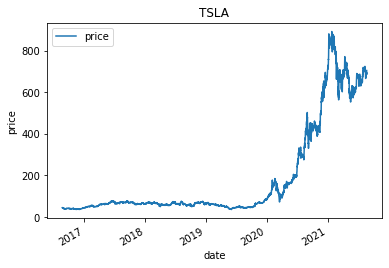

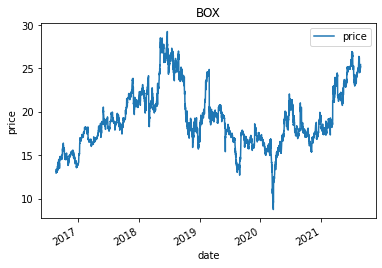

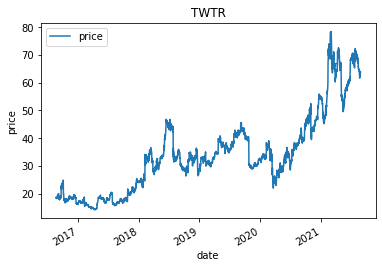

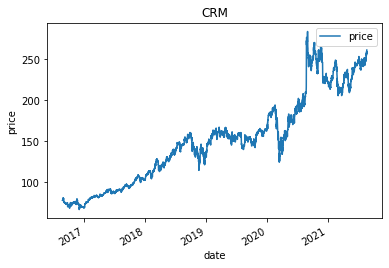

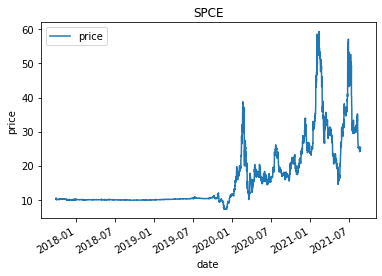

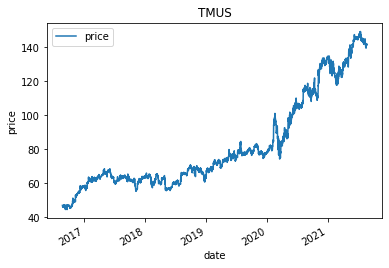

In [8]:
for stock in stocks:
    _ = stocks[stock].plot()
    _ = plt.xlabel('date')
    _ = plt.ylabel('price')
    _ = plt.title(stock)

In [9]:
for stock in stocks:
    print(stock)
    print(stocks[stock].info())

TSLA
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3654 entries, 2016-08-23 09:30:00 to 2021-08-23 16:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   3654 non-null   float64
dtypes: float64(1)
memory usage: 57.1 KB
None
BOX
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3654 entries, 2016-08-23 09:30:00 to 2021-08-23 16:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   3654 non-null   float64
dtypes: float64(1)
memory usage: 57.1 KB
None
TWTR
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3654 entries, 2016-08-23 09:30:00 to 2021-08-23 16:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   3654 non-null   float64
dtypes: float64(1)
memory usage: 57.1 KB
None
CRM
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3654 entries, 2016-08-23 09:30:0

All of the stocks have the same number of values with the exception of Virgin Galactic, which has been on the NYSE for less than the 5 year max alloted by yfinance. No missing numbers are detected.

### 1.2.4 De-trending the time series stock data <a id='1.2.4_Detrend'></a>

In [10]:
for stock in stocks:
    stocks[stock]['percent change'] = stocks[stock]['price'].pct_change()
    stocks[stock].fillna(0, inplace=True)

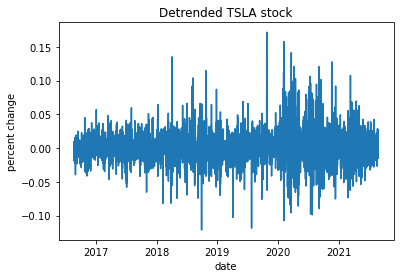

In [11]:
_ = plt.plot(stocks['TSLA'][['percent change']])
_ = plt.xlabel('date')
_ = plt.ylabel('percent change')
_ = plt.title('Detrended TSLA stock')

In [12]:
for stock in stocks:
    stocks[stock].to_pickle(f'/Users/tylerpoore/Workspace/Spring Board/Projects/Capstone_notebooks/Capstone_1_final/data{stock}_df.pkl')

## 1.2.5 Collecting the tweets <a id='1.2.5_Collecting_Tweet'></a>
We will collect the CEOs tweets over the same time-span as the collected stocks

In [13]:
# Get the tweets from the CEOs of the companies
# Get user_ids in case of name changes. 

        
user_stocks = {'elonmusk':'TSLA', 'levie':'BOX','jack':'TWTR', 'Benioff':'CRM', 
            'richardbranson':'SPCE', 'JohnLegere':'TMUS'}

In [14]:
#start_date = {}
#for user in user_stocks:
#    start_date[user] = dt.strftime(stocks[user_stocks[user]].reset_index().date.min(), '%Y-%m-%d %H:%M:%S')

In [15]:
usernames = list(user_stocks.keys())

In [16]:
#%%time

#ceos = []
#for user in usernames:
#    c = twint.Config()
#    c.Username = user
#    c.User_full = True
#    c.Count = True
#    c.Stats = True
#    c.Pandas = True
#    c.Store_pandas = True
#    c.Hide_output = True
#    c.Pandas_clean = True
#    c.Since = start_date[user]

    # run search
#    twint.run.Search(c)

# extract columns and save dataframe in list
#columns = twint.output.panda.Tweets_df.columns
#ceo = twint.output.panda.Tweets_df[columns]
#ceos.append(ceo)


ceos = pd.read_pickle('data/ceos.pkl')
usernames = ['elonmusk', 'levie', 'jack', 'Benioff','richardbranson', 'JohnLegere']

In [17]:
ceos.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,search
0,1417453075892080641,1417427520266268677,2021-07-20 07:55:22 EDT,2021-07-20,07:55:22,-0400,44196397,elonmusk,Elon Musk,,...,,,,,"[{'screen_name': 'vincent13031925', 'name': 'V...",,,,,None
1,1417390555001098246,1417251070989029376,2021-07-20 03:46:56 EDT,2021-07-20,03:46:56,-0400,44196397,elonmusk,Elon Musk,,...,,,,,"[{'screen_name': 'blueorigin', 'name': 'Blue O...",,,,,None
2,1417293886897098762,1417278493428264963,2021-07-19 21:22:49 EDT,2021-07-19,21:22:49,-0400,44196397,elonmusk,Elon Musk,,...,,,,,"[{'screen_name': 'SpacePadreIsle', 'name': 'SP...",,,,,None
3,1417277335863140363,1417277092090191884,2021-07-19 20:17:03 EDT,2021-07-19,20:17:03,-0400,44196397,elonmusk,Elon Musk,,...,,,,,"[{'screen_name': 'TLPN_Official', 'name': 'The...",,,,,None
4,1417274819461095432,1417274819461095432,2021-07-19 20:07:03 EDT,2021-07-19,20:07:03,-0400,44196397,elonmusk,Elon Musk,,...,,,,,[],,,,,None


In [18]:
CEOS = {}
for user in usernames:
    CEOS[user] = ceos[ceos['username'] == user]
    

In [19]:
start_date = {}
end_date = {}
for CEO in CEOS:
    print(CEO.upper())
    print('number of tweets:', len(CEOS[CEO]))
    print('date range:')
    start_date[CEO] = CEOS[CEO]['date'].min()
    end_date[CEO] = CEOS[CEO]['date'].max()
    print(start_date[CEO], '---' ,end_date[CEO])

ELONMUSK
number of tweets: 11622
date range:
2016-07-20 --- 2021-07-20
LEVIE
number of tweets: 1736
date range:
2016-07-21 --- 2021-07-20
JACK
number of tweets: 5124
date range:
2016-07-21 --- 2021-07-20
BENIOFF
number of tweets: 4871
date range:
2016-07-20 --- 2021-05-28
RICHARDBRANSON
number of tweets: 7711
date range:
2017-09-29 --- 2021-07-20
JOHNLEGERE
number of tweets: 37302
date range:
2016-07-20 --- 2021-07-20


In [20]:
#all_tweets = pd.DataFrame()
#for CEO in CEOS:
#    all_tweets = all_tweets.append(CEOS[CEO])
    
#all_tweets.to_pickle(f'/Users/tylerpoore/Workspace/Spring Board/Projects/Capstone_notebooks/Capstone_1_Final/data/ceos.pkl')

## 1.3 Examing and Cleaning the Data <a id='1.3_Examine_Clean'></a>

### 1.3.1 Examining The Tweets <a id='1.3.1_Examine_Tweets'></a>

In [21]:
# Examine the scraped data

for CEO in CEOS:
    print("================")
    print(CEO)
    print("================")
    print(CEOS[CEO][['date','tweet']].head(1))
    print(CEOS[CEO][['date','tweet']].tail(1))

elonmusk
         date                            tweet
0  2021-07-20  @vincent13031925 Great to hear!
             date                                              tweet
11621  2016-07-20  Finishing off the plan while listening to the ...
levie
         date                                        tweet
0  2021-07-20  This is a very sad take on entrepreneurship
            date                                              tweet
1735  2016-07-21  One part of Twitter right now is a mad man tha...
jack
         date                                              tweet
0  2021-07-20  Square Banking is live! Checking, savings, deb...
            date                                              tweet
5123  2016-07-21  Listening to: What Are Gender Barriers Made Of...
Benioff
         date                                              tweet
0  2021-05-28  Wonderful to be on @MadMoneyOnCNBC tonight ann...
            date                                              tweet
4870  2016-07-20  Exci

In [22]:
# Examine the tweet columns

CEOS['elonmusk'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11622 entries, 0 to 11621
Data columns (total 37 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               11622 non-null  object
 1   conversation_id  11622 non-null  object
 2   created_at       11622 non-null  object
 3   date             11622 non-null  object
 4   time             11622 non-null  object
 5   timezone         11622 non-null  object
 6   user_id          11622 non-null  int64 
 7   username         11622 non-null  object
 8   name             11622 non-null  object
 9   place            11622 non-null  object
 10  tweet            11622 non-null  object
 11  language         11622 non-null  object
 12  mentions         11622 non-null  object
 13  urls             11622 non-null  object
 14  photos           11622 non-null  object
 15  replies_count    11622 non-null  int64 
 16  retweets_count   11622 non-null  int64 
 17  likes_count      11622 non-null

Looking at the dataframe columns entries, there are no missing values. That may be because they are using a different character than NaN, and I will look into this later. Most are of type object, but there are 4 integer columns: user_id; reply, retweet, and like counts; and video for some odd reason; and 1 boolean retweet column. All of the columns are the same type. Let's examine the columns.

In [23]:
# Look at sample integer columns

CEOS['elonmusk'].select_dtypes(include=['int']).describe()

,user_id,replies_count,retweets_count,likes_count,video
count,11622.0,11622.000000,11622.000000,1.162200e+04,11622.000000
mean,44196397.0,985.211065,2602.205989,2.602342e+04,0.060833
std,0.0,3843.169195,10442.067297,7.333076e+04,0.239034
min,44196397.0,0.000000,0.000000,9.100000e+01,0.000000
25%,44196397.0,55.000000,49.000000,1.204000e+03,0.000000
50%,44196397.0,143.500000,163.000000,3.655500e+03,0.000000
75%,44196397.0,534.750000,984.000000,1.542325e+04,0.000000
max,44196397.0,126196.000000,355536.000000,1.574723e+06,1.000000


The video column looks like a boolean

In [24]:
CEOS['elonmusk']['video'].nunique()

2

In [25]:
CEOS['elonmusk']['video'].sum()

707

In [26]:
# Look at first set of object columns

CEOS['elonmusk'].select_dtypes(include=['object']).describe()

,id,conversation_id,created_at,date,time,timezone,username,name,place,tweet,...,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,search
count,11622,11622,11622,11622,11622,11622,11622,11622,11622,11622,...,11622,11622,11622,11622,11622,11622,11622,11622,11622,11622
unique,11622,5665,11619,1465,10736,1,1,1,1,11554,...,1,1,1,1,5620,1,1,1,1,1
top,1417453075892080641,828280866451374085,2018-04-01 18:02:31 EDT,2017-03-24,15:39:16,-0400,elonmusk,Elon Musk,,@flcnhvy True,...,,,,,[],,,,,None
freq,1,34,2,49,4,11622,11622,11622,11622,6,...,11622,11622,11622,11622,2967,11622,11622,11622,11622,11622


A lot of these columns I will exclude as they likely won't contribute any contributable features to predicting the stock price. I will determine the language after cleaning the tweets.

In [27]:
CEOS['elonmusk'][['tweet', 'mentions', 'urls', 'photos','hashtags', 'cashtags', 'quote_url']].describe()

,tweet,mentions,urls,photos,hashtags,cashtags,quote_url
count,11622,11622,11622,11622,11622,11622,11622
unique,11554,137,746,640,17,2,382
top,@flcnhvy True,[],[],[],[],[],
freq,6,11357,10812,10983,11604,11621,11231


The missing values are represented by empty lists. Let's turn this into a better represenation of missing values.

Let's look at the languages first.

In [28]:
for CEO in CEOS:
    print(CEO.upper())
    print(CEOS[CEO]['language'].value_counts())

ELONMUSK
en     10105
und     1123
tl       123
fr        38
de        36
es        30
in        24
ru        15
nl        12
pt        11
pl        10
it         9
et         9
da         8
tr         8
ca         7
lt         6
cy         6
ro         5
hi         5
no         4
ht         4
sl         3
sv         3
is         3
vi         2
cs         2
fi         2
lv         2
ja         2
hu         1
uk         1
sr         1
el         1
eu         1
Name: language, dtype: int64
LEVIE
en     1677
und      44
fr        5
es        3
it        2
pt        2
ht        1
in        1
cs        1
Name: language, dtype: int64
JACK
en     4041
und     983
es       18
fr       15
in       11
de        7
pt        5
tl        5
pl        4
ja        3
no        3
fi        3
ht        3
eu        3
cy        3
it        2
ar        2
nl        2
hu        2
ca        2
am        1
ro        1
my        1
et        1
da        1
sv        1
ko        1
Name: language, dtype: int64
BENIOF

Let's see what und is

In [29]:
CEOS['elonmusk']['tweet'][CEOS['elonmusk']['language'] == 'und']

15                                  @waitbutwhy Pohtaytohz
28                                 https://t.co/d4ZOSKZESP
31       @JeffTutorials @TonyTesla4Life @WholeMarsBlog Yes
44                    @AaronS5_ @FrenchieEAP @karpathy Yes
53                                      @Kristennetten Yup
                               ...                        
11505                                    @huntster1701 yes
11506                                      @DavidKYoon yes
11540                                 @asunshinegreene yes
11605                              https://t.co/Kgkz1Z3FwJ
11616                                         @vitiral yup
Name: tweet, Length: 1123, dtype: object

It looks like und occurs when there are a lot of mentions, links, or emojis, so I will keep this and clean them later. 

In [30]:
# Keep the en and und languages 
for CEO in CEOS:
    CEOS[CEO] = CEOS[CEO][(CEOS[CEO]['language'] == 'en') | (CEOS[CEO]['language'] == 'und')]
    CEOS[CEO].reset_index(inplace=True, drop=True)

In [31]:
for CEO in CEOS:
    print(CEO.upper())
    print(CEOS[CEO]['language'].value_counts())
    print(CEOS[CEO]['language'].value_counts().sum())

ELONMUSK
en     10105
und     1123
Name: language, dtype: int64
11228
LEVIE
en     1677
und      44
Name: language, dtype: int64
1721
JACK
en     4041
und     983
Name: language, dtype: int64
5024
BENIOFF
en     4696
und     117
Name: language, dtype: int64
4813
RICHARDBRANSON
en     7652
und      48
Name: language, dtype: int64
7700
JOHNLEGERE
en     28752
und     8207
Name: language, dtype: int64
36959


### 1.3.2 Converting to Missing Values and Categorical Features <a id='1.3.2_Missing'></a>

In [32]:
for CEO in CEOS:
    print(CEO.upper())
    print(CEOS[CEO][['mentions', 'urls', 'photos', 'hashtags', 'cashtags', 'thumbnail']])

ELONMUSK
      mentions urls photos hashtags cashtags thumbnail
0           []   []     []       []       []          
1           []   []     []       []       []          
2           []   []     []       []       []          
3           []   []     []       []       []          
4           []   []     []       []       []          
...        ...  ...    ...      ...      ...       ...
11223       []   []     []       []       []          
11224       []   []     []       []       []          
11225       []   []     []       []       []          
11226       []   []     []       []       []          
11227       []   []     []       []       []          

[11228 rows x 6 columns]
LEVIE
                                               mentions  \
0                                                    []   
1                                                    []   
2                                                    []   
3     [{'screen_name': 'ericsyuan', 'name': 'eric s....   
4   

In [33]:
# Convert empty lists into NaNs for easier processing
for CEO in CEOS:
    CEOS[CEO][['mentions', 'urls', 'photos', 'hashtags', 'cashtags', 'thumbnail']] = CEOS[CEO][['mentions', 'urls', 'photos', 'hashtags','cashtags', 'thumbnail']].applymap(lambda x: np.nan if len(x) == 0 else x)
    

In [34]:
for CEO in CEOS:
    print(CEO.upper())
    print(CEOS[CEO][['mentions', 'urls', 'photos', 'hashtags', 'cashtags', 'thumbnail']].info())

ELONMUSK
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11228 entries, 0 to 11227
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   mentions   259 non-null    object 
 1   urls       775 non-null    object 
 2   photos     607 non-null    object 
 3   hashtags   18 non-null     object 
 4   cashtags   0 non-null      float64
 5   thumbnail  672 non-null    object 
dtypes: float64(1), object(5)
memory usage: 526.4+ KB
None
LEVIE
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1721 entries, 0 to 1720
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   mentions   81 non-null     object
 1   urls       165 non-null    object
 2   photos     135 non-null    object
 3   hashtags   12 non-null     object
 4   cashtags   2 non-null      object
 5   thumbnail  148 non-null    object
dtypes: object(6)
memory usage: 80.8+ KB
None
JACK
<class 'pandas.core.frame.Dat

In [35]:
for CEO in CEOS:
    print(CEO.upper())
    print('\n')
    print('missing values')
    print('===============')
    print(CEOS[CEO][['mentions', 'urls', 'photos', 'hashtags', 'cashtags', 'thumbnail']].isna().sum())
    print('\n')

ELONMUSK


missing values
mentions     10969
urls         10453
photos       10621
hashtags     11210
cashtags     11228
thumbnail    10556
dtype: int64


LEVIE


missing values
mentions     1640
urls         1556
photos       1586
hashtags     1709
cashtags     1719
thumbnail    1573
dtype: int64


JACK


missing values
mentions     4295
urls         3900
photos       4562
hashtags     4614
cashtags     5019
thumbnail    4554
dtype: int64


BENIOFF


missing values
mentions     2446
urls         2201
photos       3162
hashtags     4484
cashtags     4813
thumbnail    2787
dtype: int64


RICHARDBRANSON


missing values
mentions     4300
urls         1369
photos       2240
hashtags     4958
cashtags     7700
thumbnail    1767
dtype: int64


JOHNLEGERE


missing values
mentions     29409
urls         29580
photos       27902
hashtags     27771
cashtags     36737
thumbnail    27019
dtype: int64




In [36]:
categ = ['mentions', 'urls', 'photos', 'hashtags', 'cashtags', 'thumbnail']
for categorical in categ:
    print(categorical.upper())
    print(CEOS['JohnLegere'][categorical][~CEOS['JohnLegere'][categorical].isna()])
    print('===========')

MENTIONS
6        [{'screen_name': 'lifehacker', 'name': 'lifeha...
18       [{'screen_name': 'neilbarua', 'name': 'neil ba...
20       [{'screen_name': 'candace_parker', 'name': 'ca...
29       [{'screen_name': 'coolcatsnft', 'name': 'cool ...
43       [{'screen_name': 'richardbranson', 'name': 'ri...
                               ...                        
36951    [{'screen_name': 'theorlandojones', 'name': 'o...
36952    [{'screen_name': 'tmobile', 'name': 't-mobile'...
36954    [{'screen_name': 'att', 'name': 'at&t', 'id': ...
36956    [{'screen_name': 'att', 'name': 'at&t', 'id': ...
36957    [{'screen_name': 'att', 'name': 'at&t', 'id': ...
Name: mentions, Length: 7550, dtype: object
URLS
0        [https://www.buzzfeed.com/juliawilling/milo-an...
1        [https://www.theverge.com/2021/7/19/22580542/j...
3        [https://mashable.com/article/nasa-hubble-imag...
5        [https://www.buzzfeed.com/hannahloewentheil/pe...
6        [https://lifehacker.com/youve-probably-been-pi..

In [37]:
%%time
# Change categoricals to binary values
for CEO in CEOS:
    for categorical in categ:
        CEOS[CEO][categorical][CEOS[CEO][categorical].isnull()] = 0

for CEO in CEOS:
    for categorical in categ:
        for i in range(len(CEOS[CEO])):
            if CEOS[CEO][categorical].iloc[i] != 0:
                if categorical != 'thumbnail':
                    CEOS[CEO][categorical].iloc[i] = len(CEOS[CEO][categorical].iloc[i])
                else:
                    CEOS[CEO]['thumbnail'].iloc[i] = 1

CPU times: user 54.2 s, sys: 811 ms, total: 55 s
Wall time: 1min 4s


In [38]:
for CEO in CEOS:
    CEOS[CEO]['cashtags'] = CEOS[CEO]['cashtags'].astype(int)

In [39]:
for CEO in CEOS:
    print(CEO.upper())
    for categorical in categ:
        print(CEOS[CEO][categorical].value_counts())
        print('============')

ELONMUSK
0    10969
1      230
2       25
3        2
4        2
Name: mentions, dtype: int64
0    10453
1      765
2        9
3        1
Name: urls, dtype: int64
0    10621
1      571
2       23
3       11
4        2
Name: photos, dtype: int64
0    11210
1       17
2        1
Name: hashtags, dtype: int64
0    11228
Name: cashtags, dtype: int64
0    10556
1      672
Name: thumbnail, dtype: int64
LEVIE
0    1640
1      64
2      15
3       2
Name: mentions, dtype: int64
0    1556
1     164
2       1
Name: urls, dtype: int64
0    1586
1     127
2       6
4       2
Name: photos, dtype: int64
0    1709
1      12
Name: hashtags, dtype: int64
0    1719
1       2
Name: cashtags, dtype: int64
0    1573
1     148
Name: thumbnail, dtype: int64
JACK
0    4295
1     571
2     118
3      30
4       8
8       1
9       1
Name: mentions, dtype: int64
0    3900
1    1113
2      11
Name: urls, dtype: int64
0    4562
1     411
2      25
4      16
3      10
Name: photos, dtype: int64
0    4614
1     386
2

### 1.3.3 Select Feature Columns and Combine Tweets for Each Day <a id='1.3.3_Features'></a>

I will be keeping most of the categorical and int features, but I won't be keeping the Cashtag column as it is empty for most of the tweets

In [40]:
# Set appropriate columns 

for CEO in CEOS:
    CEOS[CEO] = CEOS[CEO][[
        'date', 'time', 'username', 'tweet', 
        'mentions', 'hashtags', 'cashtags', 'video', 'photos', 'urls', 'thumbnail', 
        'replies_count', 'retweets_count', 'likes_count',
       ]]

In [41]:
# Need to change some of the features to integers
for CEO in CEOS:
    CEOS[CEO].fillna(0, inplace=True)

I will make a separate dataframe for these and append them to a dataframe of tweets that have been grouped by the date. Because I am looking how tweets impact the stock prices, I want to analyze tweets that happen before the price point. To this end I will be looking at the closing price, and tweets that occur on the same day after the market closes will be counted towards the following day. 

In [42]:
num_tweets = len(CEOS['elonmusk'])

In [43]:
num_tweets

11228

In [44]:
%%time 
for CEO in CEOS:
    CEOS[CEO] = combine_tweets(CEOS[CEO])

CPU times: user 58.6 s, sys: 503 ms, total: 59.1 s
Wall time: 1min 1s


In [45]:
assert num_tweets == CEOS['elonmusk']['number of tweets'].sum()

In [46]:
for CEO in CEOS:
    print('===================')
    print(CEO.upper())
    print(CEOS[CEO].describe())
    print(CEOS[CEO].shape)
    print('===================')

ELONMUSK
          mentions    hashtags  cashtags        video       photos  \
count  2179.000000  2179.00000    2179.0  2179.000000  2179.000000   
mean      0.134924     0.00872       0.0     0.308398     0.301973   
std       0.485006     0.13353       0.0     0.660007     0.703299   
min       0.000000     0.00000       0.0     0.000000     0.000000   
25%       0.000000     0.00000       0.0     0.000000     0.000000   
50%       0.000000     0.00000       0.0     0.000000     0.000000   
75%       0.000000     0.00000       0.0     0.000000     0.000000   
max       9.000000     5.00000       0.0     6.000000     7.000000   

              urls    thumbnail  replies_count  retweets_count   likes_count  \
count  2179.000000  2179.000000    2179.000000     2179.000000  2.179000e+03   
mean      0.360716     0.308398    5034.606241    13238.840753  1.325792e+05   
std       0.734334     0.660007   12441.232324    30778.554850  2.528130e+05   
min       0.000000     0.000000       6.

          mentions     hashtags     cashtags        video       photos  \
count  3415.000000  3415.000000  3415.000000  3415.000000  3415.000000   
mean      3.044510     3.669693     0.072035     2.910688     3.045681   
std       3.891741     3.981335     0.679062     2.963642     3.211673   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     1.000000     0.000000     1.000000     1.000000   
50%       2.000000     3.000000     0.000000     2.000000     2.000000   
75%       4.000000     5.000000     0.000000     4.000000     4.000000   
max      38.000000    33.000000    16.000000    25.000000    25.000000   

              urls    thumbnail  replies_count  retweets_count   likes_count  \
count  3415.000000  3415.000000    3415.000000     3415.000000   3415.000000   
mean      2.190337     2.910688     180.575403      227.087848   1201.081113   
std       2.224134     2.963642     445.733131      974.142607   1917.213745   
min       0.0

## 1.4 Combining Stocks and Tweets DataFrames <a id='1.4_Combining_DataFrames'></a>

In [47]:
# merge stocks on to tweets
for stock in stocks:
    stocks[stock].reset_index(inplace=True)
    print(stocks[stock])

                    date       price  percent change
0    2016-08-23 09:30:00   44.863998        0.000000
1    2016-08-23 16:00:00   44.967999        0.002318
2    2016-08-24 09:30:00   45.410000        0.009829
3    2016-08-24 16:00:00   44.523998       -0.019511
4    2016-08-25 09:30:00   44.622002        0.002201
...                  ...         ...             ...
3649 2021-08-21 16:00:00  688.073344        0.006376
3650 2021-08-22 09:30:00  684.578003       -0.005080
3651 2021-08-22 16:00:00  695.886678        0.016519
3652 2021-08-23 09:30:00  685.442017       -0.015009
3653 2021-08-23 16:00:00  703.700012        0.026637

[3654 rows x 3 columns]
                    date      price  percent change
0    2016-08-23 09:30:00  12.950000        0.000000
1    2016-08-23 16:00:00  13.300000        0.027027
2    2016-08-24 09:30:00  13.400000        0.007519
3    2016-08-24 16:00:00  13.070000       -0.024627
4    2016-08-25 09:30:00  13.050000       -0.001530
...                  ...   

In [48]:
CEOS_list = list(CEOS.keys())
stocks_list = list(stocks.keys())

In [49]:
for i in range(len(CEOS_list)):
    CEOS[CEOS_list[i]] = CEOS[CEOS_list[i]].merge(stocks[stocks_list[i]], how='left', on='date')

In [50]:
for CEO in CEOS:
    print(CEO.upper())
    print(CEOS[CEO].head(3))
    print(CEOS[CEO].tail(3))

ELONMUSK
                 date                                              tweet  \
0 2021-07-20 09:30:00   @vincent13031925 Great to hear! @blueorigin B...   
1 2021-07-19 16:00:00  @jack @BitcoinMagazine @CathieDWood Sure, I ha...   
2 2021-07-19 09:30:00  @DragTimes @Tesla Nice @WholeMarsBlog You don’...   

   username  mentions  hashtags  cashtags  video  photos  urls  thumbnail  \
0  elonmusk         0         0         0      0       0     0          0   
1  elonmusk         0         0         0      0       0     1          0   
2  elonmusk         0         0         0      0       0     0          0   

   replies_count  retweets_count  likes_count  number of tweets       price  \
0           7024            7245       145057                 4  651.989990   
1           1953            1477        22616                 2  646.219971   
2           1257             819        19337                 2  629.890015   

   percent change  
0        0.008929  
1        0.025925  


### 1.4.1 Sort DataFrames and Clean <a id='1.4.1_Sorting_and_Cleaning'></a>

In [51]:
# Sort by date and reset index

for CEO in CEOS:
    CEOS[CEO] = CEOS[CEO].sort_values(by='date')
    CEOS[CEO] = CEOS[CEO].set_index('date')
    CEOS[CEO] = CEOS[CEO].reset_index()

In [52]:
# Check for missing values
for CEO in CEOS:
    print(CEO)
    print(CEOS[CEO].isna().any())

elonmusk
date                False
tweet               False
username            False
mentions            False
hashtags            False
cashtags            False
video               False
photos              False
urls                False
thumbnail           False
replies_count       False
retweets_count      False
likes_count         False
number of tweets    False
price                True
percent change       True
dtype: bool
levie
date                False
tweet               False
username            False
mentions            False
hashtags            False
cashtags            False
video               False
photos              False
urls                False
thumbnail           False
replies_count       False
retweets_count      False
likes_count         False
number of tweets    False
price                True
percent change       True
dtype: bool
jack
date                False
tweet               False
username            False
mentions            False
hashtags            

Because the latest tweets are before the next market opens, some of them have missing values and I will have to remove them for now.

In [53]:
for CEO in CEOS:
    print(CEOS[CEO].shape)

(2179, 16)
(957, 16)
(1476, 16)
(1868, 16)
(2009, 16)
(3415, 16)


In [54]:
for CEO in CEOS:
    CEOS[CEO].dropna(inplace=True)

In [55]:
for CEO in CEOS:
    print(CEOS[CEO].isna().any().sum())

0
0
0
0
0
0


In [56]:
for CEO in CEOS:
    print(CEOS[CEO].shape)

(2157, 16)
(943, 16)
(1442, 16)
(1836, 16)
(2009, 16)
(3351, 16)


Normalize data types

In [57]:
CEOS['elonmusk'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2157 entries, 22 to 2178
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              2157 non-null   datetime64[ns]
 1   tweet             2157 non-null   object        
 2   username          2157 non-null   object        
 3   mentions          2157 non-null   int64         
 4   hashtags          2157 non-null   int64         
 5   cashtags          2157 non-null   int64         
 6   video             2157 non-null   int64         
 7   photos            2157 non-null   int64         
 8   urls              2157 non-null   int64         
 9   thumbnail         2157 non-null   int64         
 10  replies_count     2157 non-null   int64         
 11  retweets_count    2157 non-null   int64         
 12  likes_count       2157 non-null   int64         
 13  number of tweets  2157 non-null   int64         
 14  price             2157 

In [58]:
ints_columns = CEOS['elonmusk'].select_dtypes(include=['int']).columns
floats_columns = CEOS['elonmusk'].select_dtypes(include=['float']).columns

In [59]:
for CEO in CEOS:
    CEOS[CEO][ints_columns] = CEOS[CEO][ints_columns].astype(int)
    CEOS[CEO][floats_columns] = CEOS[CEO][floats_columns].astype(float)

### 1.4.2 DataFrame Prices vs Original Stock Prices <a id='1.4.2_Looking_at_Original_Stocks'></a>

In [60]:
### CREATE A PLOT THAT HAS TWEETS WITH STOCK PRICES, MAKE OPAQUE. SAME X DIFFERENT Y

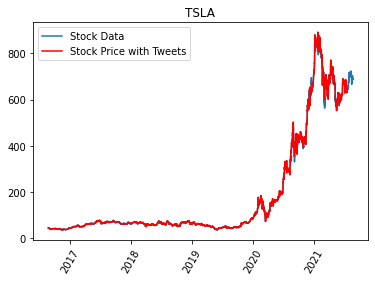

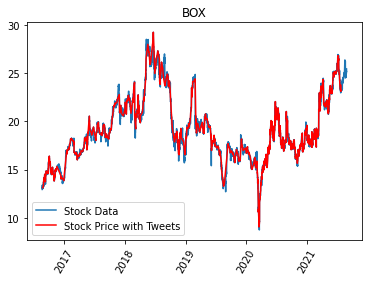

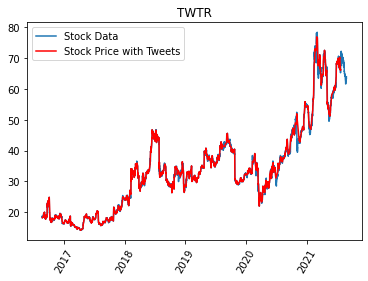

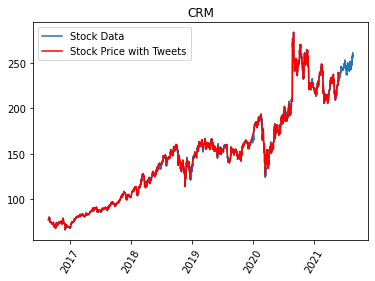

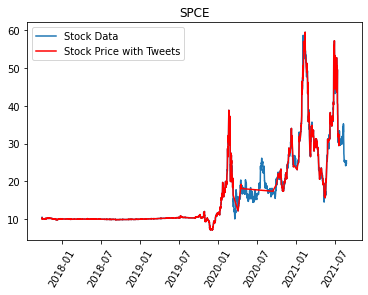

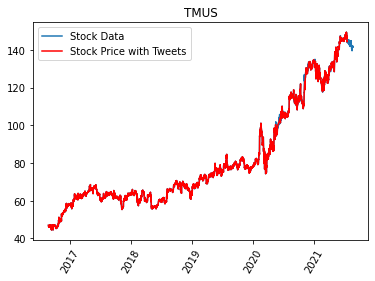

In [61]:
# Let's look to see how well the full stock prices match the merged tweet and stock DataFrames
for i in range(len(stocks_list)):
    _ = plt.plot(stocks[stocks_list[i]]['date'], stocks[stocks_list[i]]['price'])
    _ = plt.plot(CEOS[CEOS_list[i]]['date'], CEOS[CEOS_list[i]]['price'], c='red')
    _ = plt.title(stocks_list[i])
    _ = plt.xticks(rotation=60)
    _ = plt.legend(['Stock Data', 'Stock Price with Tweets'])
    _ = plt.show()

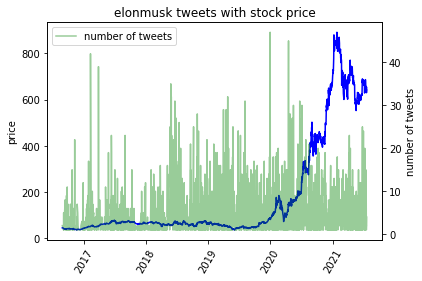

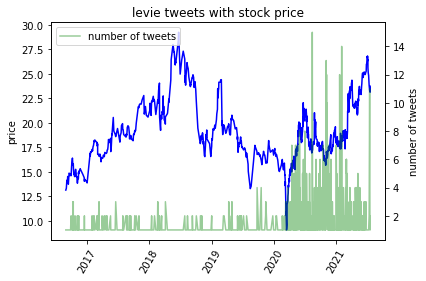

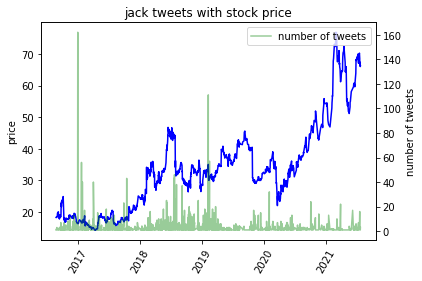

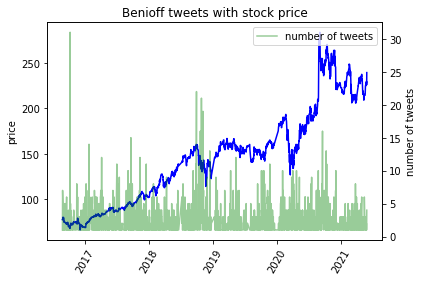

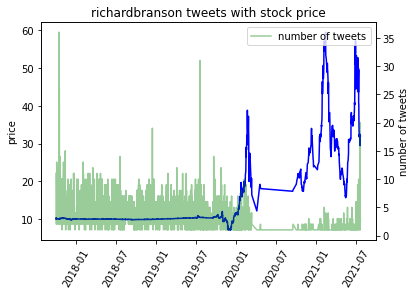

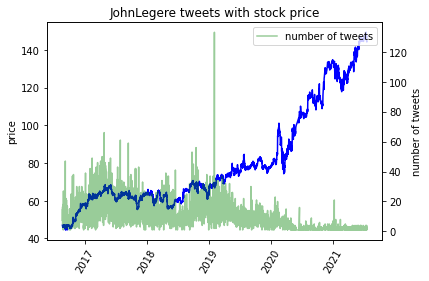

In [62]:
# Initalize a Figure and Axes
for CEO in CEOS:
    fig, ax = plt.subplots()

    # Plot the CO2 variable in blue
    ax.plot(CEOS[CEO]['date'], CEOS[CEO]['price'], color='blue')
    plt.ylabel('price')
    plt.title(f'{CEO} tweets with stock price')
    plt.xticks(rotation=60)

    # Create a twin Axes that shares the x-axis
    ax2 = ax.twinx()

    # Plot the relative temperature in red
    ax2.plot(CEOS[CEO]['date'], CEOS[CEO]['number of tweets'], color='g', alpha = 0.4)
    plt.ylabel('number of tweets')
    plt.legend(['number of tweets'])

    plt.show()

In [63]:
test = CEOS['JohnLegere']
test2 = CEOS['richardbranson']

In [64]:
test = test[test['date'] <= '2019']
test2 = test2[test2['date'] >= '2020-07']

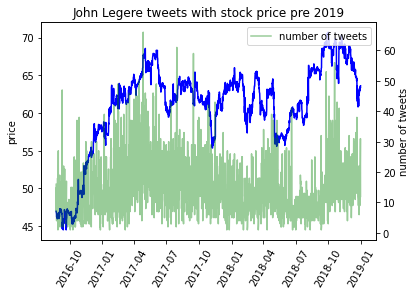

In [65]:
fig, ax = plt.subplots()

# Plot the CO2 variable in blue
ax.plot(test['date'], test['price'], color='blue')
plt.ylabel('price')
plt.title('John Legere tweets with stock price pre 2019')
plt.xticks(rotation=60)

# Create a twin Axes that shares the x-axis
ax2 = ax.twinx()

# Plot the relative temperature in red
ax2.plot(test['date'], test['number of tweets'], color='g', alpha = 0.4)
plt.ylabel('number of tweets')
plt.legend(['number of tweets'])

plt.show()

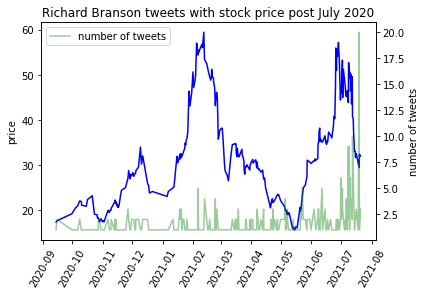

In [66]:
fig, ax = plt.subplots()

# Plot the CO2 variable in blue
ax.plot(test2['date'], test2['price'], color='blue')
plt.ylabel('price')
plt.title('Richard Branson tweets with stock price post July 2020')
plt.xticks(rotation=60)

# Create a twin Axes that shares the x-axis
ax2 = ax.twinx()

# Plot the relative temperature in red
ax2.plot(test2['date'], test2['number of tweets'], color='g', alpha = 0.4)
plt.ylabel('number of tweets')
plt.legend(['number of tweets'])

plt.show()

## 1.5 Saving Dataframes <a id='1.5_Exporting_DataFrames'></a>

In [67]:
for i in range(len(CEOS_list)):
    CEOS[CEOS_list[i]].to_pickle(f'/Users/tylerpoore/Workspace/Spring Board/Projects/Capstone_notebooks/Capstone_1_Final/data/{CEOS_list[i]}_df.pkl')

In [68]:
tweet_stocks = pd.DataFrame()
for CEO in CEOS:
    tweet_stocks = tweet_stocks.append(CEOS[CEO])

In [69]:
tweet_stocks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11738 entries, 22 to 3414
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              11738 non-null  datetime64[ns]
 1   tweet             11738 non-null  object        
 2   username          11738 non-null  object        
 3   mentions          11738 non-null  int64         
 4   hashtags          11738 non-null  int64         
 5   cashtags          11738 non-null  int64         
 6   video             11738 non-null  int64         
 7   photos            11738 non-null  int64         
 8   urls              11738 non-null  int64         
 9   thumbnail         11738 non-null  int64         
 10  replies_count     11738 non-null  int64         
 11  retweets_count    11738 non-null  int64         
 12  likes_count       11738 non-null  int64         
 13  number of tweets  11738 non-null  int64         
 14  price             1173

In [70]:
tweet_stocks.to_pickle(f'/Users/tylerpoore/Workspace/Spring Board/Projects/Capstone_notebooks/Capstone_1_Final/data/tweet_stocks.pkl')